<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [81]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.columns.to_list()


['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


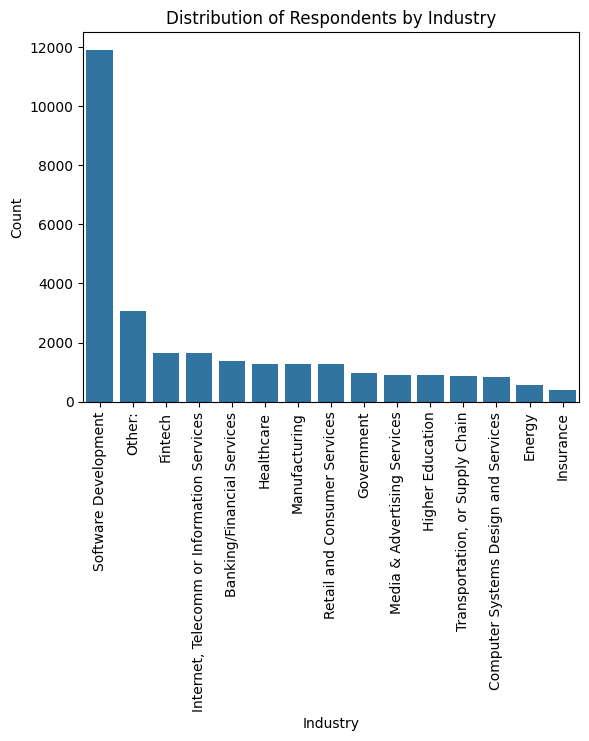

In [61]:
##Write your code here
industry= df['Industry'].value_counts()
sns.barplot( x=industry.index, y=industry.values)
plt.title('Distribution of Respondents by Industry')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


#The maximum number of respondents are from a software development industry while the least number is from the insurance sector. 


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [75]:
##Write your code here
df=df.dropna(subset=['ConvertedCompYearly'])
df['ConvertedCompYearly'].describe()

threshold= df['ConvertedCompYearly'].mean() + 3*df['ConvertedCompYearly'].std()

df_filtered= df[df['ConvertedCompYearly'] > threshold]



count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


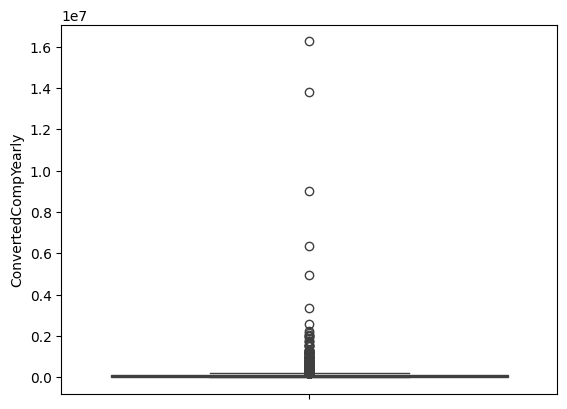

978

In [76]:
##Write your code here

import numpy as np

upper= np.quantile(df['ConvertedCompYearly'],0.75)
lower=np.quantile(df['ConvertedCompYearly'], 0.25)
IQR= upper - lower
upper_bound= upper +1.5* IQR
lower_bound = lower - 1.5*IQR

capvalue = df['ConvertedCompYearly'].quantile(0.99)
df1 = df[df['ConvertedCompYearly'] < capvalue]
#boxplot before removing the outliers
sns.boxplot(df1['ConvertedCompYearly'])
plt.title('Boxplot of Yearly Compensation')
plt.show()
outliers= df['ConvertedCompYearly'][(df['ConvertedCompYearly'] > upper_bound) | (df['ConvertedCompYearly'] < lower_bound)]
no_of_outliers= len(outliers)
no_of_outliers

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


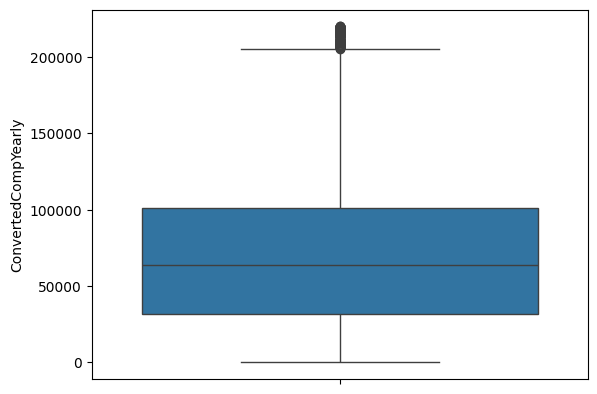

In [77]:
##Write your code here
df_cleaned = df[~df['ConvertedCompYearly'].isin(outliers)]
df_cleaned.shape

sns.boxplot(df_cleaned['ConvertedCompYearly'])
plt.show()


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [83]:
##Write your code here
age_mapping={ '25-34 years old': 29.5,
             '35-44 years old': 39.5,
             '18-24 years old': 21,
             '45-54 years old': 49.5,
             '55-64 years old': 59.5,
             '65 years or older' : 68,
             'Under 18 years old': 17,
             'Prefer not to say': 0}

df['age_numeric']= df['Age'].map(age_mapping)
df['YearsCodePro']= df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
df[['age_numeric', 'ConvertedCompYearly','YearsCodePro','JobSat' ]].corr()

,age_numeric,ConvertedCompYearly,YearsCodePro,JobSat
age_numeric,1.000000,0.121037,0.814225,0.069230
ConvertedCompYearly,0.121037,1.000000,0.141068,0.048428
YearsCodePro,0.814225,0.141068,1.000000,0.104153
JobSat,0.069230,0.048428,0.104153,1.000000


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
